In [2]:
pip install opencv-python

In [1]:
pip install tensorflow

In [ ]:
#1) perform the necessary pre-processing

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras


import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals

/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals


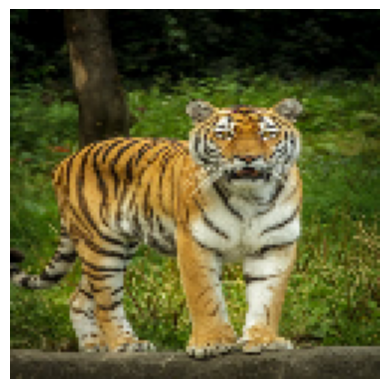

In [8]:
# plotting a random image
img = plt.imread("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Tiger/panthera-tigris-altaica-tiger-siberian-amurtiger-162173.jpeg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Tiger"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Tiger/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Cheetah"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Cheetah/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Jaguar"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Jaguar/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Leopard"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Leopard/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Lion"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Lion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [14]:
x_.shape

(170, 128, 128, 3)

In [10]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

IndexError: ignored

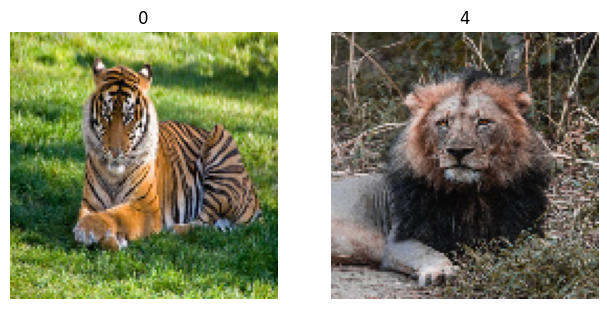

In [15]:
#plottin one of all animal types in data
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[160*i] #Changes acording to the shape
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[160*i])#Changes acording to the shape

In [16]:
#data preparation
# for replacement process i'll use keras.to_categorical
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [17]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [18]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


IndexError: ignored

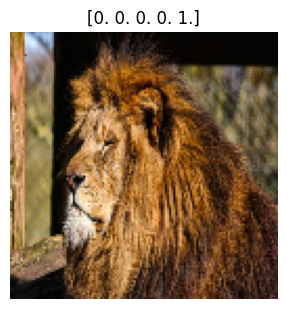

In [19]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[160*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[160*i])
plt.show()

In [20]:
#creating ANN model
print(x_train.shape)

(122, 128, 128, 3)


In [21]:
print(x_val.shape)

(22, 128, 128, 3)


In [22]:
print(y_train.shape)

(122, 5)


In [23]:
print(x_test.shape)

(26, 128, 128, 3)


In [24]:
x_train[0]

array([[[131,  96,  25],
        [165, 135,  41],
        [176, 122,  50],
        ...,
        [  5,   5,   3],
        [  5,   5,   3],
        [  5,   4,   2]],

       [[147, 111,  41],
        [174, 144,  54],
        [175, 125,  51],
        ...,
        [  5,   5,   3],
        [  5,   5,   3],
        [  5,   4,   2]],

       [[137,  97,  29],
        [160, 129,  45],
        [171, 123,  49],
        ...,
        [  5,   5,   3],
        [  5,   5,   3],
        [  5,   4,   2]],

       ...,

       [[  5,   3,   6],
        [ 13,  11,  14],
        [ 11,   9,  12],
        ...,
        [ 63,  41,  35],
        [ 36,  18,  18],
        [ 45,  27,  21]],

       [[  8,   6,   9],
        [ 13,  11,  14],
        [ 16,  13,  16],
        ...,
        [ 79,  53,  45],
        [ 64,  47,  44],
        [ 40,  25,  20]],

       [[ 17,  15,  18],
        [ 19,  17,  20],
        [ 20,  17,  20],
        ...,
        [ 75,  45,  38],
        [ 50,  33,  30],
        [ 64,  40,  35]]

In [25]:
print(x_train.shape)
print(x_test.shape)

(122, 128, 128, 3)
(26, 128, 128, 3)


In [26]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_val=x_val.astype("float32")
y_val=y_val.astype("float32")

In [27]:
x_train=x_train/255
y_train=y_train/255
x_val=x_val/255
y_val=y_val/255

In [28]:
x_train[0]

array([[[0.5137255 , 0.3764706 , 0.09803922],
        [0.64705884, 0.5294118 , 0.16078432],
        [0.6901961 , 0.47843137, 0.19607843],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314]],

       [[0.5764706 , 0.43529412, 0.16078432],
        [0.68235296, 0.5647059 , 0.21176471],
        [0.6862745 , 0.49019608, 0.2       ],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314]],

       [[0.5372549 , 0.38039216, 0.11372549],
        [0.627451  , 0.5058824 , 0.1764706 ],
        [0.67058825, 0.48235294, 0.19215687],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314]],

       ...,

       [[0.01960784, 0.01176471, 0.02352941],
        [0.05098039, 0.04313726, 0.05490196],
        [0.04313726, 0

In [29]:
#2)build ANN model

#ANN MOdel

In [30]:
IMG_SIZE = 128


In [31]:
model=Sequential()
model.add(Dropout(0.2))
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(128,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(64,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(32,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(5,activation='softmax',kernel_initializer="glorot_uniform"))


In [32]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [33]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
4/4 [==============================] - 7s 87ms/step - loss: 0.0581 - accuracy: 0.1803 - val_loss: 0.0311 - val_accuracy: 0.2273
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0535 - accuracy: 0.2213 - val_loss: 0.0633 - val_accuracy: 0.0909
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0629 - accuracy: 0.1803 - val_loss: 0.0812 - val_accuracy: 0.0909
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0674 - accuracy: 0.2131 - val_loss: 0.0468 - val_accuracy: 0.2273
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0315 - accuracy: 0.1311 - val_loss: 0.0115 - val_accuracy: 0.1364
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0111 - accuracy: 0.2131 - val_loss: 0.0108 - val_accuracy: 0.0909
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0119 - accuracy: 0.2131 - val_loss: 0.0130 - val_accuracy: 0.0909
Epoch 8/10
4/4 [===========

Text(0.5, 1.0, 'Accuracy Curves')

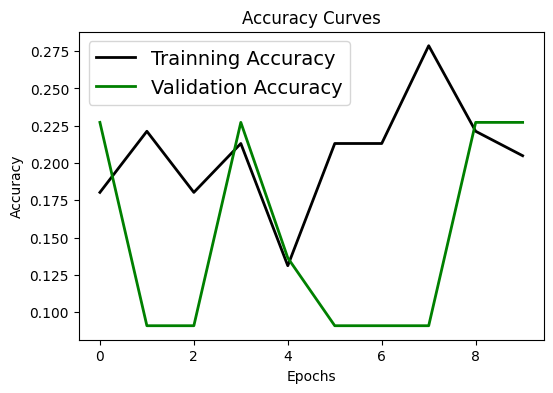

In [34]:
# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

Text(0.5, 1.0, 'Loss Curves')

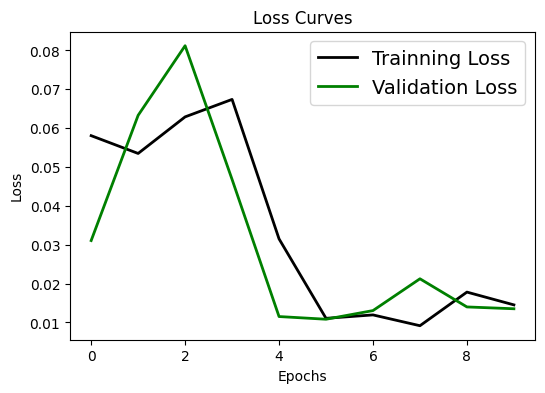

In [35]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

In [36]:
#3) implement two regularization techniques

##two regularization techniques

In [37]:
model_2=Sequential()
model_2.add(Dropout(0.2))
model_2.add(Flatten(input_shape=(128, 128, 3)))
model_2.add(Dense(128,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(64,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(32,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(5,activation='softmax',kernel_initializer="he_uniform"))

In [38]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:
history_2=model_2.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 2s 70ms/step - loss: 0.0861 - accuracy: 0.1885 - val_loss: 0.1530 - val_accuracy: 0.2727
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1795 - accuracy: 0.1475 - val_loss: 0.1751 - val_accuracy: 0.2273
Epoch 3/50
4/4 [==============================] - 0s 26ms/step - loss: 0.2421 - accuracy: 0.2131 - val_loss: 0.2601 - val_accuracy: 0.2273
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.3050 - accuracy: 0.2049 - val_loss: 0.3137 - val_accuracy: 0.2273
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3786 - accuracy: 0.2295 - val_loss: 0.3983 - val_accuracy: 0.2273
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.4825 - accuracy: 0.1311 - val_loss: 0.4478 - val_accuracy: 0.1818
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.5520 - accuracy: 0.2541 - val_loss: 0.5295 - val_accuracy: 0.2727
Epoch 8/50
4/4 [===========

In [40]:
#on analysing both the models by using two kernel regularization techniques on comparing the glorot_uniform and he_uniform the glorot uniform performes better

In [41]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Tiger"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Tiger/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Cheetah"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Cheetah/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Jaguar"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Jaguar/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Leopard"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Leopard/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Lion"):
    try:
        path = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals/Lion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [42]:
# for replacement process i'll use keras.to_categorical
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [43]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [44]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

IndexError: ignored

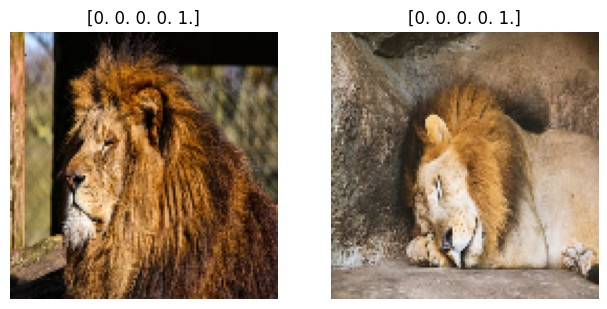

In [47]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[120*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[120*i])
plt.show()

In [ ]:
#4)building a CNN model

##CNN model

In [48]:

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)     

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [50]:
epoch = 50
batch_size = 64

In [51]:
#5)performing data augmentation

In [52]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    )
datagen.fit(x_train)

In [54]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )



Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 2.0026 - accuracy: 0.4375 - val_loss: 33.4205 - val_accuracy: 0.0909
Epoch 2/50
1/1 [==============================] - 0s 407ms/step - loss: 1.9323 - accuracy: 0.4375 - val_loss: 25.1319 - val_accuracy: 0.2273
Epoch 3/50
1/1 [==============================] - 0s 391ms/step - loss: 1.4379 - accuracy: 0.4828 - val_loss: 32.6646 - val_accuracy: 0.2727
Epoch 4/50
1/1 [==============================] - 0s 378ms/step - loss: 2.2390 - accuracy: 0.3438 - val_loss: 34.7340 - val_accuracy: 0.2273
Epoch 5/50
1/1 [==============================] - 0s 374ms/step - loss: 1.4687 - accuracy: 0.5172 - val_loss: 47.8501 - val_accuracy: 0.1364
Epoch 6/50
1/1 [==============================] - 0s 386ms/step - loss: 1.8013 - accuracy: 0.4219 - val_loss: 83.3048 - val_accuracy: 0.0909
Epoch 7/50
1/1 [==============================] - 0s 362ms/step - loss: 1.5941 - accuracy: 0.4655 - val_loss: 116.4980 - val_accuracy: 0.0909
Epoch 8/50
1/1 

In [ ]:
#on comparing the ANN and CNN model the CNN performs better with nearly 80% accuracy

In [55]:
pip install tensorflow

In [56]:
pip install tensorflow_hub

In [57]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
%cd D:\deep_learning\mobile_net

D:\deep_learning\mobile_net


In [ ]:
#7)choosing a pre-trained model -mobilenet_v2

In [58]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5", input_shape=IMAGE_SHAPE+(3,))
])

In [59]:
gold_fish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)

FileNotFoundError: ignored

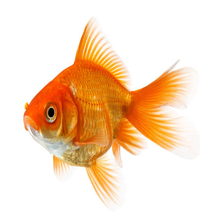

In [ ]:
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [60]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

FileNotFoundError: ignored

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 36s 0us/step


In [ ]:
https://drive.google.com/drive/folders/1VEQ9o4QAjvY4DCXrcjc3nOPTS1PeGVeL?usp=drive_link

In [72]:
dataset_url = "/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals"
data_dir = tf.keras.utils.get_file('Animal', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [73]:
data_dir

'./datasets/Animal'

In [74]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/Animal')

In [76]:
list(data_dir.glob('*/*.jpg'))[:5]

[]

In [77]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [78]:
roses = list(data_dir.glob('Cheetah/*'))
roses[:5]

[]

In [70]:
import PIL

In [71]:
PIL.Image.open(str(Cheetah[1]))

NameError: ignored

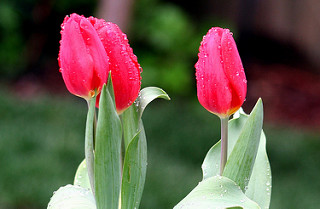

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 179, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

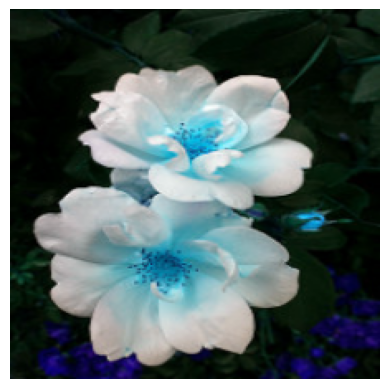

In [ ]:
plt.axis('off')
plt.imshow(X[0])

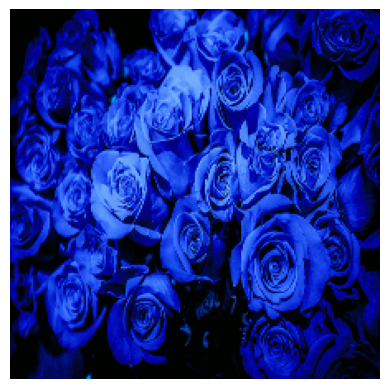

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 10s 10s/step


array([612, 816, 612], dtype=int64)

In [ ]:
#8)performing transfer learning

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 157s 1s/step - loss: 0.7900 - acc: 0.7023
Epoch 2/5
92/92 [==============================] - 119s 1s/step - loss: 0.4106 - acc: 0.8522
Epoch 3/5
92/92 [==============================] - 172s 2s/step - loss: 0.3198 - acc: 0.8937
Epoch 4/5
92/92 [==============================] - 143s 2s/step - loss: 0.2636 - acc: 0.9155
Epoch 5/5
92/92 [==============================] - 126s 1s/step - loss: 0.2304 - acc: 0.9275


In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 28s 1s/step - loss: 0.4072 - acc: 0.8569


[0.4072369933128357, 0.8569482564926147]